# Milestone Assignment 1

* *Name* : Alexander Prasetyo Christianto
* *Age* : 23
* *Last Education Background* : *Electrical Engineering*
* *Occupation* : *Full Time Data Science Student Batch-001*

## Description

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

### Problem Statement

I am a freelancer data analyst and i am given a task to analyze my client data which is Divvy. **Divvy, a bike-sharing company, wants me to analyzes their user data to find key behavioral differences between two user types: “casual members” who pay per ride and "annual members" who pay an annual subscription to the service.** Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members.

### Key Objectives

Six questions will guide this analysis for the future marketing program in Divvy:

1. Who are taking these rides, members or casuals?
2. How long are they riding?
3. Where is the busiest station?
4. What day have the most customers?
5. What type of bikes they are riding?
6. Does the rideable type has relationship with the membership of Divvy users?

**STAKEHOLDERS INCLUDE**:

- Cyclistic executive team
- Lily Moreno (fictional supervisor)

### About Dataset

The data is on an AWS server where it is easily downloadable and named correctly. I downloaded the previous 13 months data and stored it locally for the next steps in the analysis processes. It is organized by year and Fiscal Quarters. The data is current, cited, original but not reliable. There are some null values and outliers in the data.

Note that data-privacy issues prohibits me from using riders’ personally identifiable information. This means that you won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.

The files are saved in comma-seperated values (CSV).

Tools used to analyze this data are Excel and Python

Link to previous 12 months of Cyclistic Trip Data: https://divvy-tripdata.s3.amazonaws.com/index.html

## Workstation

This part contains of libraries of data analysis and visualization, data pre-processing and data processing.

#### Libraries Used

As part of our preparation of processing the data, I am going to use all the libraries below

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt
from scipy import stats

#### Data Pre-processsing

In Data Analytics, the first step is data collection were you gather, obtain, and measure the necessary data from available internal or external data sources, and then compiled the data into an established system. I will be using the Divvy dataset for the case study. The purpose of this script is to consolidate downloaded Divvy data into a single dataframe and then conduct simple analysis to help answer the key objectives.

In [2]:
# importing the data from January 2021 to December 2021

df1 = pd.read_csv('202101-divvy-tripdata.csv')
df2 = pd.read_csv('202102-divvy-tripdata.csv')
df3 = pd.read_csv('202103-divvy-tripdata.csv')
df4 = pd.read_csv('202104-divvy-tripdata.csv')
df5 = pd.read_csv('202105-divvy-tripdata.csv')
df6 = pd.read_csv('202106-divvy-tripdata.csv')
df7 = pd.read_csv('202107-divvy-tripdata.csv')
df8 = pd.read_csv('202108-divvy-tripdata.csv')
df9 = pd.read_csv('202109-divvy-tripdata.csv')
df10 = pd.read_csv('202110-divvy-tripdata.csv')
df11 = pd.read_csv('202111-divvy-tripdata.csv')
df12 = pd.read_csv('202112-divvy-tripdata.csv')

In [3]:
# merging all data into one data frame

cyclistic_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])
cyclistic_data.shape

(5595063, 13)

Since I have multiple data sets to use for analysis, I have to perform data integration by combining all the data sets into one data set.

In [4]:
cyclistic_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [5]:
cyclistic_data.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member
247539,37AC57E34B2E7E97,classic_bike,2021-12-13 08:45:32,2021-12-13 08:49:09,Michigan Ave & Jackson Blvd,TA1309000002,Dearborn St & Monroe St,TA1305000006,41.877850,-87.624080,41.881320,-87.629521,member


I am calling `head` and `tail` function to check the first 5 rows and the last 5 rows from the new data frame i just created.

In [6]:
cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


The dataset contains 5595063 rows of records and 13 columns of attributes. The data types of the attributes consist of 4 float data types, 9 object data types. The memory space usage is at least 597.6+ MB. The next step is data cleaning to remove null values, data reduction to remove redundant attributes and duplicate values. This wil ensure that data is of high quality and would produce quality analysis.

Apparently, I need to tweak the data type from several columns and renaming column name to make for easier readability. Here are the pre-processing list i am going to do:

- Change the `member_casual` column name to `member_type`
- Change the `rideable_type`, `member_type` data type from object dtype to categorical dtype.
- The data type for `started_at`, `ended_at` were changed to a datetime datatype.
- Creating a new column named `ride_duration` to see the duration in each trip.
- Creating 3 new columns named `day_name`, `year` and `month` from `started_at` column.
- Handling the missing values.

During the course of my data cleaning, I discovered that 13.2% of the dataset was made up of null values which is below the 25% maximum, so i dropped them. I also sorted my data by ascending order according to `started_at` column and lastly checked for duplicate data.

In [7]:
# renaming column

cyclistic_data.rename(columns={'member_casual':'member_type'}, inplace=True)

I renamed column `member_casual` to `member_type` for easier understanding and readibility.

In [8]:
# changing data type

cyclistic_data['rideable_type'] = cyclistic_data.rideable_type.astype('category')
cyclistic_data['member_type'] = cyclistic_data.member_type.astype('category')
cyclistic_data['started_at'] = pd.to_datetime(cyclistic_data.started_at)
cyclistic_data['ended_at'] = pd.to_datetime(cyclistic_data.ended_at)

As i mentioned before, changing the data types will make it easier for the analysis and saving memory.

In [9]:
# adding a new column ride_length (ended_at - started_at) to calculate the time travelled

cyclistic_data['ride_duration'] = cyclistic_data['ended_at'] - cyclistic_data['started_at']
cyclistic_data['ride_duration']

0        0 days 00:10:25
1        0 days 00:04:04
2        0 days 00:01:20
3        0 days 00:11:42
4        0 days 00:00:43
               ...      
247535   0 days 00:19:13
247536   0 days 00:07:01
247537   0 days 00:08:17
247538   0 days 00:14:13
247539   0 days 00:03:37
Name: ride_duration, Length: 5595063, dtype: timedelta64[ns]

I just added a new column named `ride_duration` for further analysis. This column is created by subtracting the `end_date` column with `start_date`.

In [10]:
# splitting and extracting the date from the 'started_at' column

cyclistic_data['start_date'] = cyclistic_data.started_at.dt.date
cyclistic_data.start_date.head()

0    2021-01-23
1    2021-01-27
2    2021-01-21
3    2021-01-07
4    2021-01-23
Name: start_date, dtype: object

Since I need the days names from the `started_at` column so I will extract the dates contained in the `started_at` column.

In [11]:
# converting 'day_of_week' into a datetime dtype

cyclistic_data['start_date']= pd.to_datetime(cyclistic_data.start_date)
cyclistic_data.dtypes

ride_id                        object
rideable_type                category
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_type                  category
ride_duration         timedelta64[ns]
start_date             datetime64[ns]
dtype: object

Changing the new column i just made to a datetime dtype. And then, by using function `dt.day_name()`, i can get the names of the days.

In [12]:
# finding the day name from `start_date` column
 
cyclistic_data['day_name'] = cyclistic_data['start_date'].dt.day_name()
cyclistic_data['day_name'].unique()


array(['Saturday', 'Wednesday', 'Thursday', 'Monday', 'Sunday', 'Friday',
       'Tuesday'], dtype=object)

Then i changed the column with day names to category datatypes.

In [13]:
# changing day_name to categorical dtype

cyclistic_data['day_name']= cyclistic_data.day_name.astype('category')
cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 16 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_type         category       
 13  ride_duration       timedelta64[ns]
 14  start_date          datetime64[ns] 
 15  day_name            category       
dtypes: category(3), datetime64[ns](3), float64(4), object(5), timedelta64[ns](1)
memory usage: 613.6+ MB


In [14]:
# extracting year and month from `start_date`

cyclistic_data['year'] = pd.DatetimeIndex(cyclistic_data['start_date']).year
cyclistic_data['month'] = pd.DatetimeIndex(cyclistic_data['start_date']).month

I also extracted the year and month from `start_date` column for further visualization and analysis. Again, for a better readablity i sorted the data frame according `started_at` from the oldest to newest.

In [15]:
# sorting the dataframe by ascending using start date

cyclistic_data.sort_values(by=['started_at'], inplace= True, ascending= True)

I also ran a check to see if thee were any Null values. Apperently, there are a lot of null values.

In [16]:
# checking the null values

cyclistic_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_type                0
ride_duration              0
start_date                 0
day_name                   0
year                       0
month                      0
dtype: int64

Interesting find here that there are 4771 null value rows in `end_lat` and `end_lng` columns. This may indicate that there are bikes that are stollen or never returned to a station.

In [17]:
cyclistic_data.shape

(5595063, 18)

In [18]:
# finding the total percentage of null values in the dataset

(739170/5595063) * 100

13.211111295797743

The null values in the dataset is occupying 13.2% of total data and the missing value is still below 25% of the data. I choose to drop the rows that are containing the null values because columns `start_station_name`, `start_station_id`, `end_station_name`, `end_station_id` have their own latitude and longitude, thus making it unable to be manipulated. Moreover latitude and longitude represents a location so it cannot be manipulated by filling with median value or mean value.

In [19]:
cyclistic_data.dropna(inplace= True)

It is always recommended to do a double check before starting data processing. Here i checked if there are still any missing values and duplicated values.

In [20]:
cyclistic_data.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_type           0
ride_duration         0
start_date            0
day_name              0
year                  0
month                 0
dtype: int64

In [21]:
cyclistic_data.duplicated().any()

False

Pre-processing of the dataframe is done and now i can move on to data processing part.

#### Data Processing

##### Who are taking these rides, members or casuals?

The people who use Divvy bikes can be categorized based on their membership. There are 2 types of members, namely casual members and annual members. In this objective, I will find out about the number of Divvy bicycle users for 12 months starting from January 2021 to December 2021.

In [22]:
# check the number of users in each type over the past 12 months

user_types = cyclistic_data['member_type'].value_counts()
user_types

member    2539923
casual    2048379
Name: member_type, dtype: int64

There are 2539923 annual members and 2048379 casual members.

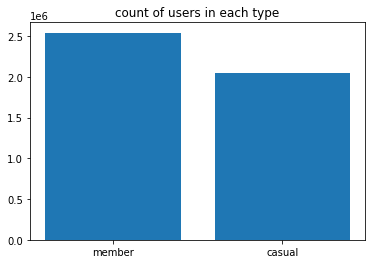

In [23]:
# to plot the bar chart of the number of users in each type over the past 12 months

plt.title('count of users in each type')
plt.bar(user_types.index, user_types.values)
plt.show()

Text(0.5, 1.0, 'Pie Chart of users in each type')

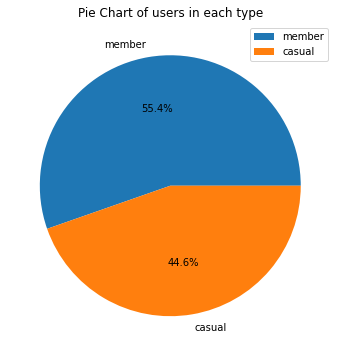

In [24]:
# to plot the pie chart of users in each type 

plt.figure(figsize = (9,6))
plt.pie(user_types.values, labels= user_types.index, autopct= '%1.1f%%')
plt.legend(user_types.index)
plt.show
plt.title('Pie Chart of users in each type')

Both the bar graph and the pie chart, it shows that there are more Divvy users who buy annual members than casual members. 55.4% of Divvy's users is annual member and 44.6% is casual member.

To make it more detail, i will make a figure showing the numbers of annual members and casual members per month.

In [25]:
# seggregating the number of users into members and casual over year

users_over_year = cyclistic_data.groupby('year')['member_type'].value_counts()
users_over_year

year        
2021  member    2539923
      casual    2048379
Name: member_type, dtype: int64

In [26]:
users_over_month = cyclistic_data.groupby('month')['member_type'].value_counts()
users_over_month

month        
1      member     68819
       casual     14690
2      member     34383
       casual      8613
3      member    130049
       casual     75642
4      member    177787
       casual    120420
5      member    234165
       casual    216829
6      member    304586
       casual    304192
7      casual    369415
       member    322906
8      casual    341476
       member    332933
9      member    328219
       casual    292931
10     member    288855
       casual    189117
11     member    185926
       casual     69978
12     member    131295
       casual     45076
Name: member_type, dtype: int64

In [27]:
list_month = []
list_x = []
list_y = (users_over_month.values)
for i, j in users_over_month.index:
    list_x.append(j)
    list_month.append(str(i))

c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Annual and Casual Over the Months')

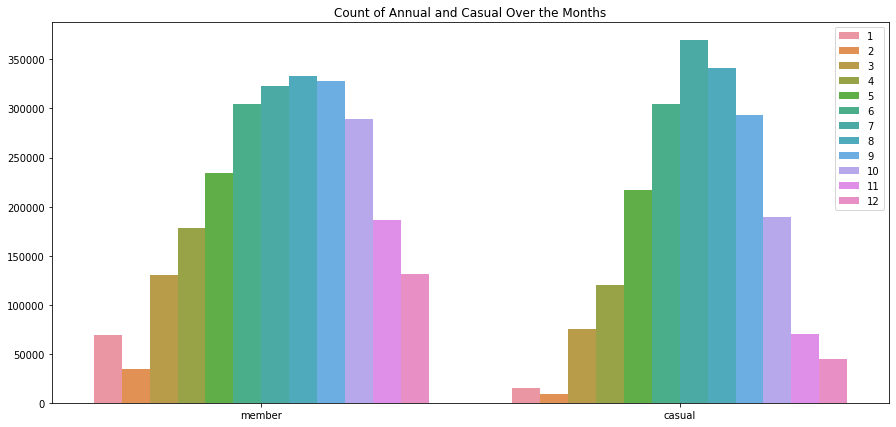

In [28]:
# plot count of members and casual riders

plt.figure(figsize= (15,7))
sns.barplot(list_x, list_y, hue = list_month)
plt.title('Count of Annual and Casual Over the Months')

The graph above plots the count of annual members and casual members per month, and it correlates with the calculation i've done.

From the graph, we can get information that there is a decrease in the number of members from January 2021 to February 2021. Likewise, Divvy casual users from January 2021 to February 2021 experienced a decrease, although not significantly. July 2021 is the month that has the most casual Divvy users. In addition, Divvy casual users have a more significant increase from February 2021 to July 2021. The increase in the number of annual Divvy members is also not as much as the increase in the number of casual Divvy members from February 2021 to June 2021.

---

##### How long they are riding?

In this objective, I will find out about the duration of cycling for Divvy users, both annual members and casual members. I will also look for the average duration of an annual and casual member's trip. In the process of finding the average trip duration, I will censor data that causes anomalies in the distribution of Divvy user trip duration data.

In [29]:
# quick check on the central tendecies and distribution on ride_duration column

cyclistic_data.ride_duration.describe(datetime_is_numeric=True)

count                      4588302
mean     0 days 00:21:48.637676421
std      0 days 03:04:25.503842186
min              -1 days +23:04:06
25%                0 days 00:06:57
50%                0 days 00:12:12
75%                0 days 00:22:07
max               38 days 20:24:09
Name: ride_duration, dtype: object

I do a quick check up on the `ride_duration` column and found out that there are anomalies in `ride_duration` column. The anomalies are there are negative values and 38 days of ride duration. The negative value may be caused by system bugs and the excessive ride duration can be caused by bicycles not being returned so the Divvy system automatically timeouts. It can also be caused due to system bugs.

In [30]:
cyclistic_data['ride_duration_in_minutes'] = cyclistic_data['ride_duration'] / pd.Timedelta(minutes=1)

Here i make a new column named `ride_duration_in_minutes`. It is a column that contains a conversion from `ride_duration` column. The conversion i just did is converting the dtype of `ride_duration` from timedelta to float to the new column i just made.

In [31]:
cyclistic_data['ride_duration_in_minutes'].min()

-55.9

In [32]:
cyclistic_data['ride_duration_in_minutes'].max()

55944.15

And after doing a manual check, it is true that there is a data anomaly in the `ride_duration` column. -55 minutes and 55944 minutes of trip doesn't make any sense at all.

In [33]:
cyclistic_data['ride_duration_in_minutes'].median()

12.2

In [34]:
cyclistic_data['ride_duration_in_minutes'].mean()

21.810627940357875

I can see that the value of median and average of ride duration is significantly different. But to make it sure, i am going to check the skewness value. The skewness value can tell me whether the data is right skewed or left skewed. Skewness can be caused by the anomalies that i have checked before, such as negative values and excessive ride duration. 

In [35]:
cyclistic_data['ride_duration_in_minutes'].skew()

143.38955120523843

And the skewness value is 143. This value is way too high and it indicates that the data in `ride_duration_in_minutes` is tailing to the right side of x axis or right skewed.

This anomaly needs to be handled or it may messes with my analysis also it may give false insights about the data. I am going to censor those anomalies values with some calculation and dropping the value of ride duration less than equal to 0 minutes. 

I am going to explain how i censor the anomalies values. First, i need to calculate lower, upper quartile of ride duration and find the range between the upper and lower quartile. Next, the range value will be multiplied by 1.5 and then added to the value of the upper quartile. That way i will know the value to change the value of those anomalies.

In [36]:
q1 = cyclistic_data['ride_duration_in_minutes'].quantile(q=0.25)
q3 = cyclistic_data['ride_duration_in_minutes'].quantile(q=0.75)
iqr = cyclistic_data['ride_duration_in_minutes'].quantile(q=0.75) - cyclistic_data['ride_duration_in_minutes'].quantile(q=0.25)
iqr

15.166666666666668

In [37]:
max_for_outlier = q3 + (1.5*iqr)
print (max_for_outlier)

44.86666666666667


Now i am going to replace the anomaly values with number of 44.86 because that is the result of the calculatin i have explained before.

In [38]:
cyclistic_data[cyclistic_data['ride_duration_in_minutes']>44.86]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_type,ride_duration,start_date,day_name,year,month,ride_duration_in_minutes
41479,DC41683B55F3110C,classic_bike,2021-01-01 00:35:51,2021-01-01 14:05:57,Lincoln Ave & Roscoe St,TA1307000138,Dodge Ave & Main St,E011,41.943340,-87.670970,42.034632,-87.699188,casual,0 days 13:30:06,2021-01-01,Friday,2021,1,810.100000
94443,89E93432C2D20698,electric_bike,2021-01-01 01:18:13,2021-01-01 02:11:13,Halsted St & Wrightwood Ave,TA1309000061,Lake Shore Dr & Belmont Ave,TA1309000049,41.929176,-87.649229,41.940685,-87.639276,member,0 days 00:53:00,2021-01-01,Friday,2021,1,53.000000
39294,8CB3DEF1451E3172,docked_bike,2021-01-01 03:05:38,2021-01-01 11:46:40,Michigan Ave & Pearson St,13034,Michigan Ave & Lake St,TA1305000011,41.897660,-87.623510,41.886024,-87.624117,casual,0 days 08:41:02,2021-01-01,Friday,2021,1,521.033333
52986,23026C4233A298B1,docked_bike,2021-01-01 06:00:48,2021-01-03 19:16:01,Wood St & Taylor St (Temp),13285,Keystone Ave & Montrose Ave,KA1504000164,41.869265,-87.673731,41.961108,-87.728970,casual,2 days 13:15:13,2021-01-01,Friday,2021,1,3675.216667
3477,969109538AFD008E,docked_bike,2021-01-01 06:44:03,2021-01-01 09:13:53,Damen Ave & Charleston St,13288,Lake Shore Dr & Monroe St,13300,41.920082,-87.677855,41.880958,-87.616743,casual,0 days 02:29:50,2021-01-01,Friday,2021,1,149.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139009,4F1974BEAEFF5EC7,docked_bike,2021-12-31 23:40:47,2022-01-01 00:26:06,Michigan Ave & Washington St,13001,Millennium Park,13008,41.883984,-87.624684,41.881032,-87.624084,casual,0 days 00:45:19,2021-12-31,Friday,2021,12,45.316667
34620,47427D53D0714BA4,docked_bike,2021-12-31 23:40:47,2022-01-01 00:26:11,Michigan Ave & Washington St,13001,Millennium Park,13008,41.883984,-87.624684,41.881032,-87.624084,casual,0 days 00:45:24,2021-12-31,Friday,2021,12,45.400000
150079,C5566F3C4E3601E0,classic_bike,2021-12-31 23:50:17,2022-01-01 00:49:03,Lakeview Ave & Fullerton Pkwy,TA1309000019,Wells St & Hubbard St,TA1307000151,41.925858,-87.638973,41.889906,-87.634266,casual,0 days 00:58:46,2021-12-31,Friday,2021,12,58.766667
131716,7B3D0E8AB0842D5E,classic_bike,2021-12-31 23:58:21,2022-01-01 00:46:56,Michigan Ave & Lake St,TA1305000011,Clinton St & Tilden St,13037,41.886024,-87.624117,41.875885,-87.640795,casual,0 days 00:48:35,2021-12-31,Friday,2021,12,48.583333


In [39]:
cyclistic_data.shape

(4588302, 19)

In [40]:
(348649/4588302) * 100

7.598649783732632

Before replacing the anomalies, i have calculated the amount of anomalies in ride duration column and the anomalies is occupying 7.59% of the total data. In the pre-processing section we have dropped about 13% of our previous total data, so i am not going to drop anymore rows because i may lose important data. Also because we are doing a censoring so i am not going to drop any rows

In [41]:
# changing the anomaly values

cyclistic_data["ride_duration_in_minutes"] = np.where(cyclistic_data['ride_duration_in_minutes']>44.86, 44.86,cyclistic_data['ride_duration_in_minutes'])

Next step is to remove the values less than equal to 0 minutes in ride duration column. As per usual i will check the amount of the 0 and negative values before dropping them.

In [42]:
# filtered the negative values

negative_duration = cyclistic_data['ride_duration_in_minutes'] <= 0

# showing the number of negative time duration
cyclistic_data[negative_duration].count()

ride_id                     198
rideable_type               198
started_at                  198
ended_at                    198
start_station_name          198
start_station_id            198
end_station_name            198
end_station_id              198
start_lat                   198
start_lng                   198
end_lat                     198
end_lng                     198
member_type                 198
ride_duration               198
start_date                  198
day_name                    198
year                        198
month                       198
ride_duration_in_minutes    198
dtype: int64

There are only 198 rows of negative and 0 values in the ride duration column. This amount is relatively small compared to the total of the data. So it is mostly safe to drop them.

In [43]:
cyclistic_data.drop(cyclistic_data[negative_duration].index, inplace=True)

Now let us check the skewness value again.

In [44]:
cyclistic_data['ride_duration_in_minutes'].skew()

1.0711302608955802

After checking the skewness value of `ride_duration_in_minutes` again, the skewness value has changed from 143 to only 1.03. This still indicates that the data is right skewed but it is much better than before. So, i move on to calculate the new median, average, minimum and maximum value from ride duration all member types.

In [45]:
cyclistic_data["ride_duration_in_minutes"].mean()

16.27139636175009

In [46]:
cyclistic_data["ride_duration_in_minutes"].median()

12.2

In [47]:
cyclistic_data["ride_duration_in_minutes"].min()

0.016666666666666666

In [48]:
cyclistic_data["ride_duration_in_minutes"].max()

44.86

Here's the insight i got by calculating the central tendecies from ride duration:
- The average ride duration for all members from January 2021 to December 2021 is 16 minutes
- The median, in this context, or the most middle duration is 12.2 minutes.
- The shortest ride duration is 0.0116 minutes or just about 1 second. This may be caused by system glitch or some people happenly mistakes to pull out a bike and then instantly stop the trip.
- The longest ride duration is 44.86 minutes.

How about the average duration from each member type? Below i have calculated the average ride duration from each member type.

In [49]:
member_filter = cyclistic_data['member_type'] == 'member'
cyclistic_data[member_filter].ride_duration_in_minutes.mean()

12.624800649258672

In [50]:
member_filter = cyclistic_data['member_type'] == 'casual'
cyclistic_data[member_filter].ride_duration_in_minutes.mean()

20.792885994824676

- The average annual member ride duration is 12.62 minutes throughout January 2021 to December 2021.
- The average casual member ride duration is longer compared to annual member which is 20.79 minutes from January 2021 to December 2021.

For better details, i calculated the average ride duration for all members per day.

In [51]:
# calculate the average ride length for all users in a week
user_avg_rides = cyclistic_data.groupby('day_name')['ride_duration_in_minutes'].mean()
user_avg_rides

day_name
Friday       15.590408
Monday       15.734380
Saturday     18.644296
Sunday       19.206577
Thursday     14.368957
Tuesday      14.583833
Wednesday    14.409172
Name: ride_duration_in_minutes, dtype: float64

Here are the results of average ride duration per day:

- Monday       15.734380 minutes.
- Tuesday      14.583833 minutes.
- Wednesday    14.409172 minutes.
- Thursday     14.368957 minutes.
- Friday       15.590408 minutes.
- Saturday     18.644296 minutes.
- Sunday       19.206577 minutes.

Now, i want to visualize the average of ride duration for each member type per day.

In [52]:
# calculate the average ride length for members in a week

user_avg_members = cyclistic_data[cyclistic_data['member_type'] == 'member'].groupby('day_name')['ride_duration_in_minutes'].mean()
user_avg_members

day_name
Friday       12.297368
Monday       12.234923
Saturday     13.998941
Sunday       14.277267
Thursday     11.923507
Tuesday      11.981513
Wednesday    12.025028
Name: ride_duration_in_minutes, dtype: float64

In [53]:
# calculate the average ride length for casual_riders in a week

user_avg_casual = cyclistic_data[cyclistic_data['member_type'] == 'casual'].groupby('day_name')['ride_duration_in_minutes'].mean()
user_avg_casual

day_name
Friday       19.743287
Monday       21.030430
Saturday     22.186227
Sunday       23.006046
Thursday     18.442524
Tuesday      19.282808
Wednesday    18.755219
Name: ride_duration_in_minutes, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

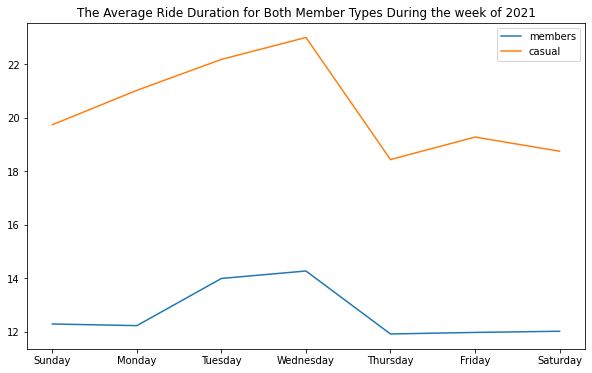

In [54]:
plt.figure(figsize = (10,6))
plt.plot(user_avg_members)
plt.plot(user_avg_casual)
plt.title('The Average Ride Duration for Both Member Types During the week of 2021')
plt.legend(['members', 'casual'])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(user_avg_members.index, labels)
plt.show

From the graph above, it shows that casual riders spend more time on rides during the week, compared to annual riders.

---

##### Where is the busiest station?

The next objective is to find the starting station that is the most crowded by Divvy users. Information will be very useful for Divvy. They can target their marketing programs at the stations most visited by Divvy users.

First, I will look for the most frequently visited starting and end stations by calculating the frequency of their occurrence in the dataframe. I will only take the top 5 stations.

In [55]:
top5startstation = cyclistic_data['start_station_name'].value_counts().sort_values(ascending=False).head()
top5startstation

Streeter Dr & Grand Ave    80293
Michigan Ave & Oak St      42764
Wells St & Concord Ln      41631
Millennium Park            40469
Clark St & Elm St          39486
Name: start_station_name, dtype: int64

In [56]:
top5endstation = cyclistic_data['end_station_name'].value_counts().sort_values(ascending=False).head()
top5endstation

Streeter Dr & Grand Ave    81771
Michigan Ave & Oak St      43499
Wells St & Concord Ln      42020
Millennium Park            41751
Clark St & Elm St          38920
Name: end_station_name, dtype: int64

From the above calculation, the next step is just to add both values. Luckily enough, the top 5 most visited station, both starting and ending, are the same. So, i don't need to perform any extra steps.

In [57]:
totalstationcounts = top5startstation + top5endstation
totalstationcounts

Streeter Dr & Grand Ave    162064
Michigan Ave & Oak St       86263
Wells St & Concord Ln       83651
Millennium Park             82220
Clark St & Elm St           78406
dtype: int64

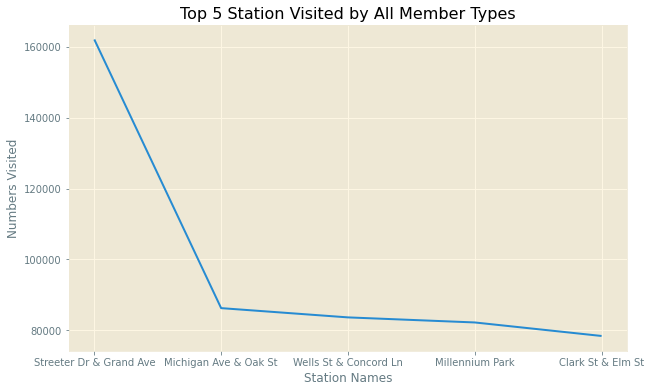

In [58]:
plt.figure(figsize=(10,6))
plt.style.use('Solarize_Light2')
plt.plot(totalstationcounts)
plt.xlabel("Station Names")
plt.ylabel("Numbers Visited")
plt.title('Top 5 Station Visited by All Member Types')
plt.show()

The graph shows that the most visited stations are :

1. Streeter Dr & Grand Ave
2. Michigan Ave & Oak St
3. Wells St & Concord Ln
4. Millennium Park
5. Clark St & Elm St

Although, I do have information on which stations Divvy users visit the most. I am not satisfied with the information because it is still a little inaccurate. I don't know about the distribution of Divvy member types in the five stations. Therefore, I will look for stations that are most frequently visited by each type of Divvy member.

In [59]:
start_station_busyness = cyclistic_data.groupby('member_type')['start_station_name'].apply(lambda x: x.value_counts().head(5))
start_station_busyness

member_type                          
casual       Streeter Dr & Grand Ave     64432
             Millennium Park             32176
             Michigan Ave & Oak St       28657
             Shedd Aquarium              22539
             Theater on the Lake         20613
member       Clark St & Elm St           23892
             Wells St & Concord Ln       22753
             Kingsbury St & Kinzie St    22661
             Wells St & Elm St           20243
             Dearborn St & Erie St       18651
Name: start_station_name, dtype: int64

Now, we have the result. Next step is to plot the result above to a chart.

In [60]:
list_station = []
list_x = []
list_y = (start_station_busyness.values)
for i, j in start_station_busyness.index:
    list_x.append(j)
    list_station.append(str(i))

c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of member and casual riders starting station over the months')

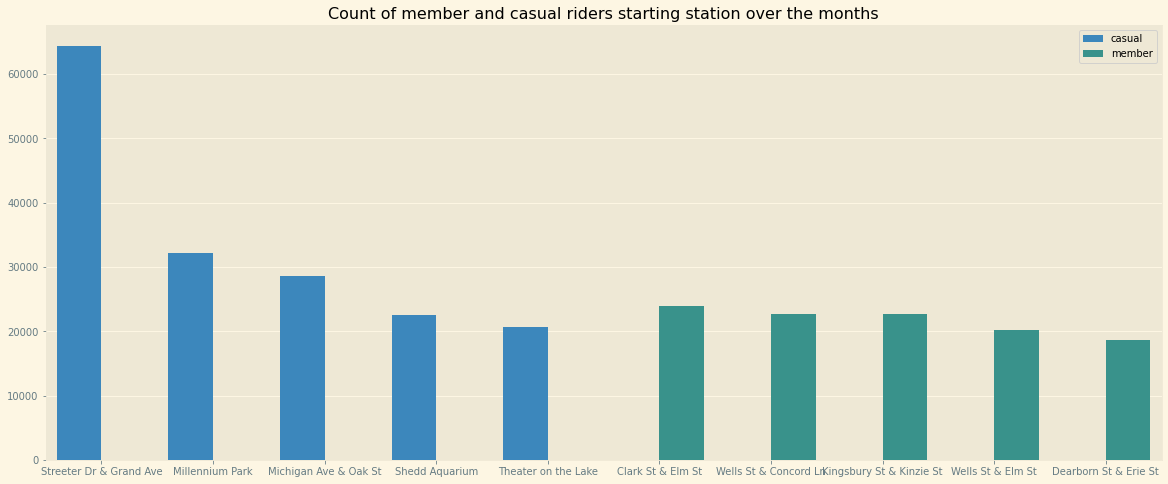

In [61]:
# plot count of members and casual riders
plt.figure(figsize= (20,8))
sns.barplot(list_x, list_y, hue =list_station)
plt.title('Count of member and casual riders starting station over the months')

The graph above shows us that the busiest station for casual member is Streeter Dr & Grand Ave. Meanwhile, the most frequently visited station by annual Divvy members is Clark St & Elm st.

In [62]:
end_station_busyness = cyclistic_data.groupby('member_type')['end_station_name'].apply(lambda x: x.value_counts().head(5))
end_station_busyness

member_type                          
casual       Streeter Dr & Grand Ave     67503
             Millennium Park             33736
             Michigan Ave & Oak St       30359
             Theater on the Lake         22302
             Shedd Aquarium              21152
member       Clark St & Elm St           23961
             Wells St & Concord Ln       23405
             Kingsbury St & Kinzie St    22844
             Wells St & Elm St           20794
             Dearborn St & Erie St       19313
Name: end_station_name, dtype: int64

In [63]:
list_station_end = []
list_x_end = []
list_y_end = (end_station_busyness.values)
for i, j in end_station_busyness.index:
    list_x_end.append(j)
    list_station_end.append(str(i))

c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of member and casual riders ending station over the months')

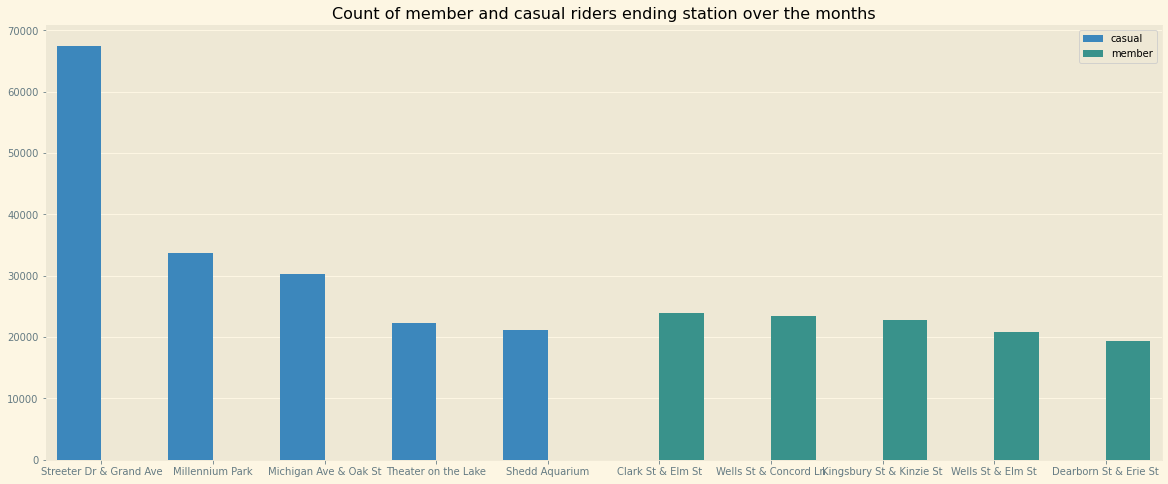

In [64]:
# plot count of members and casual riders
plt.figure(figsize= (20,8))
sns.barplot(list_x_end, list_y_end, hue = list_station_end)
plt.title('Count of member and casual riders ending station over the months')

For the ending station, the most frequently visited station is still Streeter Dr & Grand Ave for casual members. Meanwhile, the most frequent station visited by annual members is still the same which is Clark St & Elm St.

For summary, station Streeter Dr & Grand is the most frequently visited station both as starting and ending station for casual members. Station Clark & Elm St. is the most frequently visited station as starting and ending station for annual member. This may indicate that those two areas is where people work, live, or maybe a destination.

---

##### What day have the most customers?

In this objective, I wanted to find out which days of the week are the most crowded with Divvy users. By knowing the busiest days for Divvy users, I can provide useful information for Divvy marketing programs.

In [65]:
mode_week_day = cyclistic_data['day_name'].mode()
mode_week_day

0    Saturday
Name: day_name, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [66]:
count_users = cyclistic_data.groupby('day_name')['ride_id'].count()
count_users = count_users.sort_index()
count_users

day_name
Friday       655624
Monday       575245
Saturday     825180
Sunday       714771
Thursday     597520
Tuesday      602900
Wednesday    615654
Name: ride_id, dtype: int64

So, based on the results of the formulation above, **Saturday** is the day that has the most number of Divvy users. As we know, weekend is the right time to do a little recreation around their respective homes or traveling around the area.

For a better detail, i will count the day that has the most annual member and casual member. Below here are the calculations.

In [67]:
mode_week_day_member = cyclistic_data[cyclistic_data['member_type'] == 'member']
mode_week_day_member = mode_week_day_member['day_name'].mode()
mode_week_day_member

0    Wednesday
Name: day_name, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [68]:
mode_week_day_casual = cyclistic_data[cyclistic_data['member_type'] == 'casual']
mode_week_day_casual = mode_week_day_casual['day_name'].mode()
mode_week_day_casual

0    Saturday
Name: day_name, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

Based on the results, Wednesday is the day that has the most annual member rides, while casual members mostly rides Divvy on Saturday.

In [69]:
count_members = cyclistic_data[cyclistic_data['member_type'] == 'member'].groupby('day_name')['ride_id'].count()
count_members

day_name
Friday       365667
Monday       346373
Saturday     356984
Sunday       311126
Thursday     373375
Tuesday      388015
Wednesday    397561
Name: ride_id, dtype: int64

In [70]:
# calculate the no. of rides by casual riders in a week
count_casual = cyclistic_data[cyclistic_data['member_type'] == 'casual'].groupby('day_name')['ride_id'].count()
count_casual

day_name
Friday       289957
Monday       228872
Saturday     468196
Sunday       403645
Thursday     224145
Tuesday      214885
Wednesday    218093
Name: ride_id, dtype: int64

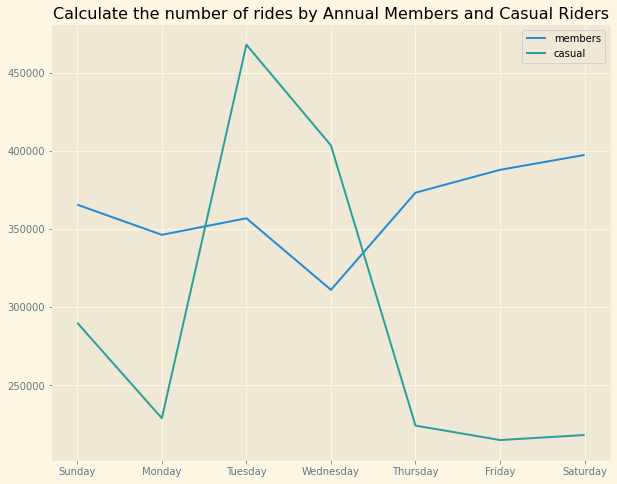

In [71]:
# plot the graph for number of rides by casual riders and annual members 
plt.figure(figsize = (10,8))
plt.plot(count_members.index, count_members.values)
plt.plot(count_casual.index, count_casual.values)
plt.title('Calculate the number of rides by Annual Members and Casual Riders')
plt.legend(['members', 'casual'])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(count_casual.index, labels)
plt.show()

A visualization of the number of rides by annual members and casual member. From this visualization, we can see that there is a spike in rides by casual riders and a sharp drop in rides by members during the midweek, also rides by members rises steadily for members during the weekends and also a heavy drop in rides by casual riders during that same period.

---

##### What type of bikes they are riding?

By finding out the type of bicycle used by Divvy users, the information we should be able to obtain is the preference of the annual member's bicycle type and also the casual member's.

In [72]:
# To check the amount of users for a particular ride_type

ride_type = cyclistic_data.groupby('member_type')['rideable_type'].value_counts()
ride_type

member_type               
casual       classic_bike     1261197
             electric_bike     474623
             docked_bike       311973
member       classic_bike     1979775
             electric_bike     559325
             docked_bike            1
Name: rideable_type, dtype: int64

Here i just checked the amount Divvy users grouped from their member type and the bike type and then count the values. Annual member and casual member mostly uses classic bike. There is an anomaly here which is the docked bike was only used once by a single annual member throughout January 2021 to December 2021. Meanwhile, the docked bike has been used by casual members for over 300.000 times. I assume that the docked bike doesn't included in the annual membership benefits and then got mistakenly used by an annual member.

In [73]:
# to seggregate the number of users into members and casual riders based on ride type

list_member = []
list_x = []
list_y = list(ride_type.values)
for i, j in ride_type.index:
    list_x.append(j)
    list_member.append(str(i))

c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Member and Casual riders over the months based on ride_type')

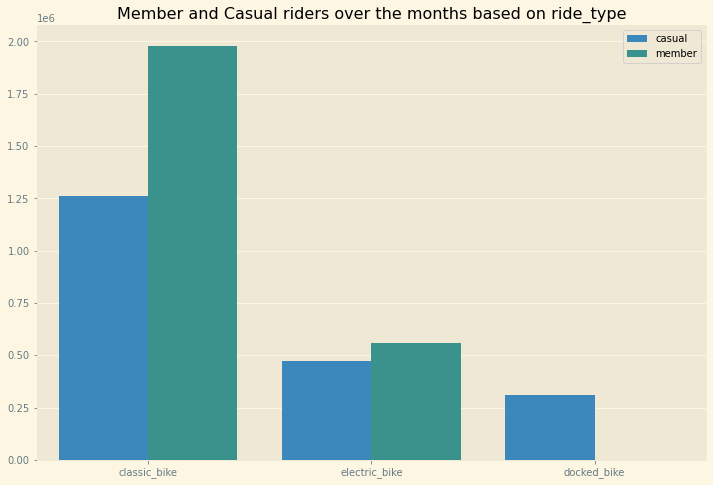

In [74]:
# to plot the number of users into members and casual riders based on rider type
plt.figure(figsize=(12,8))
sns.barplot(list_x, list_y, hue=list_member)
plt.title('Member and Casual riders over the months based on ride_type')

The bar graph shows that annual members used the bikes more compared to casual members.

##### Does bike type has relationship with the membership?

Now I will do a hypothesis test on a case that I have made. The case that I made is whether the type of bike affects the membership type of Divvy users. From this case, what I will do is a hypothesis test using the chi-square method. The chi-square test is one of the methods used to convey or show the existence of a relationship (presence or absence) between the variables studied. The first step is to determine the contingency table of the 2 variables to be tested. It should be noted that these two variables must be categorical data. And in the previous key objective, I also found an anomaly where the docked bike was only used once by a Divvy annual membership user.

In [75]:
cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4586894 entries, 78336 to 100735
Data columns (total 19 columns):
 #   Column                    Dtype          
---  ------                    -----          
 0   ride_id                   object         
 1   rideable_type             category       
 2   started_at                datetime64[ns] 
 3   ended_at                  datetime64[ns] 
 4   start_station_name        object         
 5   start_station_id          object         
 6   end_station_name          object         
 7   end_station_id            object         
 8   start_lat                 float64        
 9   start_lng                 float64        
 10  end_lat                   float64        
 11  end_lng                   float64        
 12  member_type               category       
 13  ride_duration             timedelta64[ns]
 14  start_date                datetime64[ns] 
 15  day_name                  category       
 16  year                      int64  

Defining the null and alternative hypothesis:

H0 : Bike type has no relationship with Divvy user membership type<br>
H1 : Bike type has relationship with Divvy user membership type

In [76]:
contingency_table=pd.crosstab(cyclistic_data["rideable_type"],cyclistic_data["member_type"])
contingency_table

member_type,casual,member
rideable_type,,
classic_bike,1261197,1979775
docked_bike,311973,1
electric_bike,474623,559325


Then below is the calculation of the chi-square hypothesis test

In [77]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=0.000
Probably dependent


Based on the results of the chi-square hypothesis test that was just carried out, I got the result that the null hypothesis was rejected, so that the two variables, namely bike type and member type, may have a relationship.

### Summary of Exploratory Data Analysis

Now I will summarize the points of data exploration that I have done.

The dataset used in this exploratory data analysis consists of 12 datasets which are combined into a large dataset. The dataset is pre-processed and at this stage the data type is changed, the date column is extracted to the day, month, year column, changed the column name for easier readability and also handled missing values. When handling missing values, I found information where there were bicycles that were not returned to the station. There are 4771 records that the bicycle does not return to its station. It is possible that this could be due to theft or a Divvy system error. Then the number of missing values ​​from the initial data is 13% of the total data and the missing values ​​are discarded.

In the data processing section, there are 6 objective keys that are sought. First, who has used the Divvy bike? Divvy bike users are categorized into two types, namely casual and annual membership. Casual membership is a one-time or one-way membership type. Meanwhile, annual membership is a type of Divvy membership that is paid monthly for a full year. Of the total Divvy users, the number of casual members of Divvy is 45% and annual members of Divvy are 55%. there is a decrease in the number of members from January 2021 to February 2021. Likewise, Divvy casual users from January 2021 to February 2021 experienced a decrease, although not significantly. July 2021 is the month that has the most casual Divvy users. In addition, Divvy casual users have a more significant increase from February 2021 to July 2021. The next objective is to calculate the trip duration for Divvy users. In this objective analysis process, I censored anomalous values, such as too long and negative durations. After censoring, the average trip duration for Divvy users during 2021 is 16 minutes. The average duration of an annual member's trip for one year is 12 minutes, while the average duration of a casual member's trip is 20 minutes. The next objective is to find out which bicycle station is the most visited by divvy users. Overall, regardless of the member type of Divvy, the stations most frequently visited by Divvy users are Streeter Dr & Grand Ave stations. Likewise, taking into account the type of Divvy membership, Streeter Dr & Grand Ave stations are still the most frequently visited stations as starting and ending stations. Then the next objective, which day has the highest number of Divvy ride users? The answer is Saturday. For the annual member type, the day that has the highest number of rides is Wednesday, while for casual members it is Saturday. Then the next objective is to analyze the type of bicycle used by Divvy users, and based on the analysis that has been done, both annual and casual members most often use classic bicycle types. During this objective analysis, an anomaly was found, namely the docked bike type was only used once by the annual member. This may be due to a system error or the annual membership does not include the use of the docked bike type. The last objective is to test the relationship between bicycle types and Divvy membership types. In this analysis, the chi-square hypothesis testing method is used and the test results say that the type of bicycle and the type of membership may have a relationship.

## Conclusion

From analyzing the data, i found this key behavioral between annual members and casual members :

- Currently, Divvy user has more subscribed annual members than casual members.
- There is also a surge in casual member during the months of July and August.
- Casual members use the bikes for longer periods of time compared to annual members.
- Casual members use the bikes heavily during the midweek (Tuesdays, Wednesdays) while annual Members use the bikes more from Thursday to the weekends.
- Annual and casual members are concentrated at the same station which is Streeter Dr & Grand Ave. This station is a hot station for starting and ending station.
- The classic bike is the most common to use for bot annual and casual members. Annual member used electric bike more frequent compared to casual member.
- There is a probability that the bike type has a relationship to the membership type.

## Suggestion

Here is my suggestion based on the analysis:

- The majority of casual riders use the bikes during the weekday, Divvy marketing strategies should target casual riders that use the bikes for commutes to work.
- The casual members spend longer trip duration compared to annual members. Divvy marketing strategies should start from these casual members and convert them to annual members so it is more cheaper for the casual members and more profit for Divvy.
- Since Streeter Dr & Grand Ave is the busiest station, the marketing program or sales program should start at that station. We can help and influence casual riders to become members by telling them that it's more cheaper or more suitable for them if they are going to use it more frequently to become a member user type.